In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [54]:
warnings.filterwarnings("ignore")

In [171]:
import pyarrow # In order to work with feather files , do install pyarrow package ..


## 1.. What is Feather & how to read data from data !

'''Feather is a binary file format that is used for storing data ..
Feather is a fast, lightweight, and easy-to-use binary file format for storing data 
It shows high I/O speed, doesn’t take too much memory on the disk and doesn’t need any unpacking when loaded back into RAM.
Feather has max I/O speed'''

In [56]:
all_data=pd.read_feather(r"D:\Projects\Sales+Analysis\Sales_data.ftr")

In [57]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [174]:

#The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost ,purchase address, etc


##Data cleaning and formatting

In [58]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [59]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [175]:
all_data=all_data.dropna(how='all') ### since there 545 observations where entire row have missing value , u can drop these 545 rows..

In [61]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [62]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [176]:
all_data[all_data.duplicated()] # check whether u have duplicate rows or not !

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City


In [64]:
all_data=all_data.drop_duplicates() # Dropping all the duplicate rows 

In [65]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Analyzing Monthaly sales

Q1 which is best month for sale

In [66]:
all_data['Order Date'][0].split('/')[0]

'04'

In [67]:
def return_month(x):
    return x.split('/')[0]

##### add month col

In [68]:
all_data['Order Month']=all_data['Order Date'].apply(return_month)

In [69]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [70]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Order Month         object
dtype: object

In [71]:
all_data['Order Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [72]:
#Excluding that row where order month value='Order Date'
all_data=all_data[~(all_data["Order Month"]=='Order Date')]

In [73]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Order Month         object
dtype: object

In [74]:
all_data["Order Month"]=all_data["Order Month"].astype(int)

In [75]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [76]:
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype(int)
all_data["Price Each"]=all_data["Price Each"].astype(float)

In [77]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Order Month           int32
dtype: object

In [177]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each'] #Get 'sales' feature by multiplying quantity and price

In [79]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


<Axes: xlabel='Order Month'>

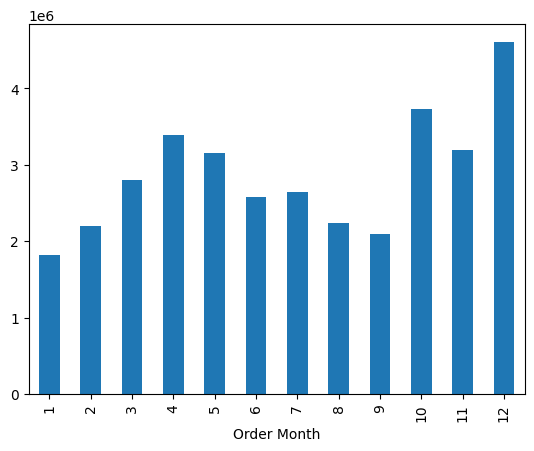

In [80]:
all_data.groupby(['Order Month'])['sales'].sum().plot(kind='bar')

Analyzing which city has maximum order

In [85]:
all_data["Purchase Address"][0].split(',')[1]

' Dallas'

In [86]:
def return_city(x):
    return x.split(',')[1]

In [87]:
all_data['City']=all_data['Purchase Address'].apply(return_city)

In [90]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [93]:
a=all_data.groupby(['City'])['Quantity Ordered'].sum()

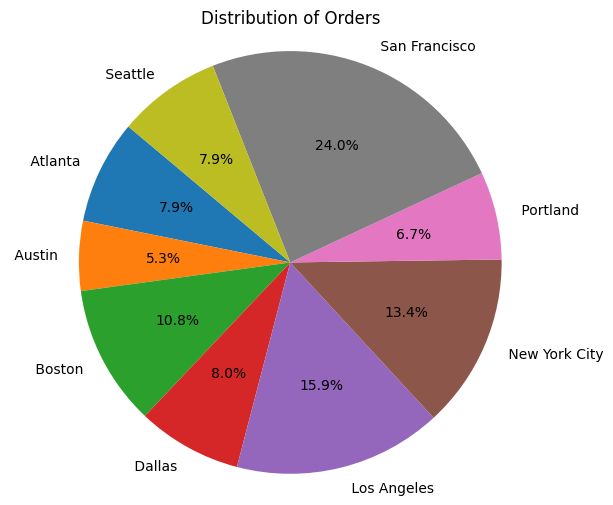

In [101]:
plt.figure(figsize=(6, 6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Orders')
plt.show()

## undersatnding which product sold the most and why?

In [103]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Order Month', 'sales', 'City'],
      dtype='object')

In [105]:
count_df=all_data.groupby(["Product"]).agg({'Quantity Ordered':'sum','Price Each':'mean'})

In [107]:
count_df=count_df.reset_index()

In [115]:
products=count_df['Product'].values

In [116]:
products

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

Text(0, 0.5, 'Avg Price')

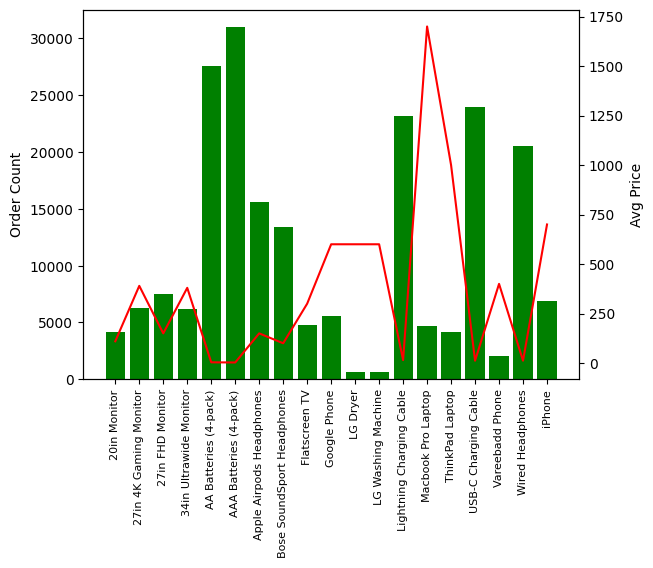

In [121]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(count_df['Product'],count_df['Quantity Ordered'],color='g')
ax2.plot(count_df['Product'],count_df['Price Each'],color='r')
ax1.set_xticklabels(products,rotation='vertical',fontsize=8)
ax1.set_ylabel("Order Count")
ax2.set_ylabel("Avg Price")

## Understanding the trend of most sold product

In [128]:
most_sold_product=all_data["Product"].value_counts()[0:5].index

In [130]:
all_data['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [132]:
most_sold_product_df=all_data[all_data['Product'].isin(most_sold_product)]

In [133]:
most_sold_product_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [137]:
pivot=pd.crosstab(most_sold_product_df['Order Month'],most_sold_product_df['Product'])

<Axes: xlabel='Order Month'>

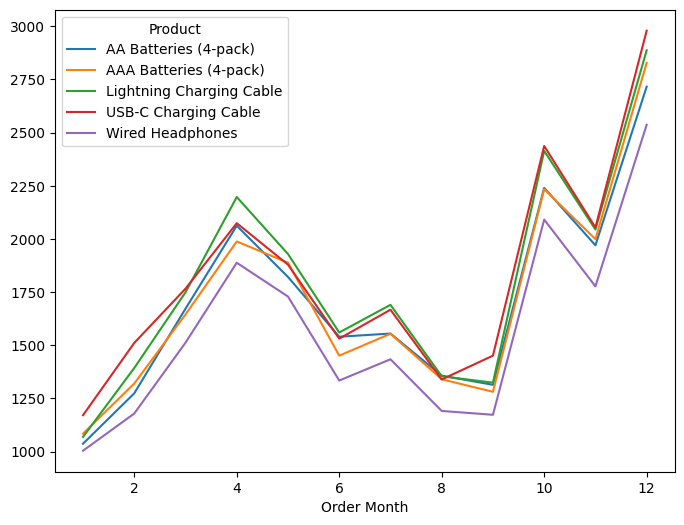

In [146]:

pivot.plot(figsize=(8,6))

In [142]:
pivot1=most_sold_product_df.groupby(["Order Month",'Product']).size().unstack()

What producs are most sold often?

In [147]:
all_data['Order ID'].duplicated(keep=False)

0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185686, dtype: bool

In [149]:
duplicated_df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [150]:
duplicated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [156]:
group_df=duplicated_df.groupby(["Order ID"])["Product"].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product':'Grouped Product'})

In [157]:
group_df

,Order ID,Grouped Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [159]:
dup_products_df=group_df.merge(duplicated_df,how="left",on="Order ID")

In [160]:
dup_products_df

,Order ID,Grouped Product,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,sales,City
0,141275,"USB-C Charging Cable,Wired Headphones",USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.95,Austin
1,141275,"USB-C Charging Cable,Wired Headphones",Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,11.99,Austin
2,141290,"Apple Airpods Headphones,AA Batteries (4-pack)",Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles
3,141290,"Apple Airpods Headphones,AA Batteries (4-pack)",AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles
4,141365,"Vareebadd Phone,Wired Headphones",Vareebadd Phone,1,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City
...,...,...,...,...,...,...,...,...,...,...
14123,319584,"iPhone,Wired Headphones",Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",12,11.99,Portland
14124,319596,"iPhone,Lightning Charging Cable",iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,700.00,New York City
14125,319596,"iPhone,Lightning Charging Cable",Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,14.95,New York City
14126,319631,"34in Ultrawide Monitor,Lightning Charging Cable",34in Ultrawide Monitor,1,379.99,12/17/19 22:35,"363 Highland St, Austin, TX 73301",12,379.99,Austin


In [162]:
no_duplicated_df=dup_products_df.drop_duplicates(subset=['Order ID'])

In [163]:
no_duplicated_df.shape

(6879, 10)

<Axes: ylabel='count'>

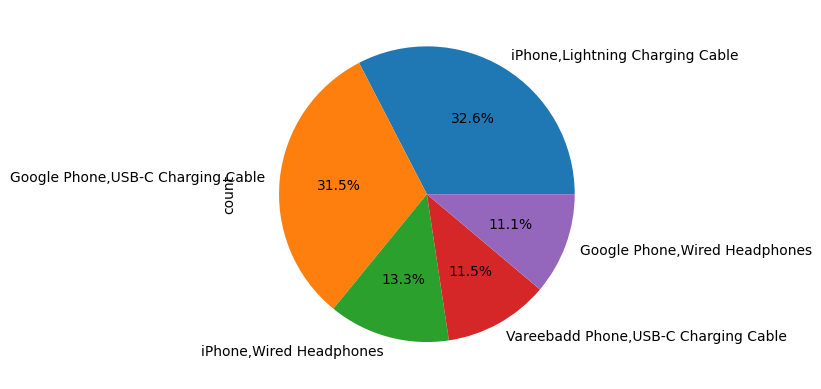

In [169]:
no_duplicated_df["Grouped Product"].value_counts()[0:5].plot.pie(autopct='%1.1f%%')